# Описание проекта

Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

# Загрузка и подготовка данных

In [ ]:
# Загрузим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
# Загрузили и ознакомились с датасетами по регионам бурения
df_1 = pd.read_csv('/datasets/geo_data_0.csv') # регион № 1
df_2 = pd.read_csv('/datasets/geo_data_1.csv') # регион № 2
df_3 = pd.read_csv('/datasets/geo_data_2.csv') # регион № 3
display(df_1.head())
display(df_2.head())
display(df_3.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
# Посмотрели на отсутствие пропусков и типы данных
display(df_1.info())
display(df_2.info())
display(df_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [ ]:
# Посмотрели на уникальные значения
display(df_1.nunique())
display(df_2.nunique())
display(df_3.nunique())
# Странные значения в id, дубли скважин
# Странные значения в product - 2 регион.

id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

In [ ]:
# Проверили уникальные значения в 'id'
df_1['id'].value_counts()

HZww2    2
QcMuo    2
A5aEY    2
AGS9W    2
Tdehs    2
        ..
RrtLx    1
FU7TF    1
cvlck    1
WB9LI    1
Vh9fS    1
Name: id, Length: 99990, dtype: int64

In [ ]:
df_1[df_1['id'] == 'bsk9y'].head()
# Наименование одно, а данные другие.

,id,f0,f1,f2,product
89582,bsk9y,0.398908,-0.400253,10.122376,163.433078
97785,bsk9y,0.378429,0.005837,0.160827,160.637302


In [ ]:
# id скважин лучше дропнуть, т.к. смысла в них нет, да еще и некорректно дублируются
df_1 = df_1.drop('id', axis=1)
df_2 = df_2.drop('id', axis=1)
df_3 = df_3.drop('id', axis=1)

In [ ]:
# Представим себя нефтянником, и обрубим все после запятой, 
# мы же меряем в 1000 барелях, и нам нужны сразу большие и понятные цифры:)
df_1['product'] = df_1['product'].round(0).astype('Int64')
df_2['product'] = df_2['product'].round(0).astype('Int64')
df_3['product'] = df_3['product'].round(0).astype('Int64')
# Проверили, что за 12 уникальных значений
# Выборки как будто разбили на 12 столбиков до нас по объемам
df_2['product'].value_counts() 

54     8472
27     8468
84     8431
57     8390
3      8337
81     8320
30     8306
135    8304
111    8303
0      8235
138    8233
108    8201
Name: product, dtype: int64

In [ ]:
# Обратимся к статистике и сделаем выводы
display(df_1.describe())
display(df_2.describe())
display(df_3.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500620
std,0.871832,0.504433,3.248248,44.289494
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.000000
50%,0.502360,0.250252,2.515969,92.000000
75%,1.073581,0.700646,4.715088,129.000000
max,2.362331,1.343769,16.003790,185.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.00000
mean,1.141296,-4.796579,2.494541,68.85204
std,8.965932,5.119872,1.703572,46.02096
min,-31.609576,-26.358598,-0.018144,0.00000
25%,-6.298551,-8.267985,1.000021,27.00000
50%,1.153055,-4.813172,2.011479,57.00000
75%,8.621015,-1.332816,3.999904,108.00000
max,29.421755,18.734063,5.019721,138.00000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,94.998580
std,1.732045,1.730417,3.473445,44.751123
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.000000
50%,0.009424,-0.009482,2.484236,95.000000
75%,1.158535,1.163678,4.858794,131.000000
max,7.238262,7.844801,16.739402,190.000000


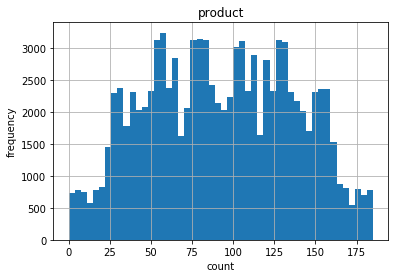

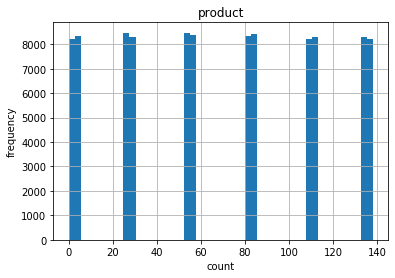

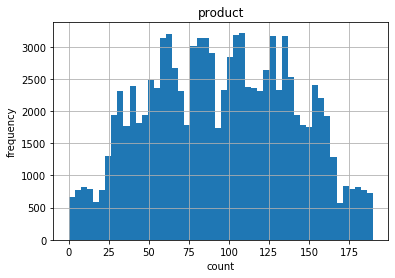

In [ ]:
def show_me_hist(df, i):
    df[df.columns.values[i]].hist(bins=50)
    plt.xlabel('count')
    plt.ylabel('frequency')
    plt.title(df.columns.values[i])
    plt.show()
show_me_hist(df_1, 3)
show_me_hist(df_2, 3)
show_me_hist(df_3, 3)

**Вывод**
- Регион 1 - среднее и медианы равны, ср.кв.отклонение 44, нормальное распределение;
- Регион 2 - среднее выше, чем медиана, значит больше скважин с большими значениями, данные завалены в право, но если посмотреть на график, то мы увидим Нью-Йорк. Можно сказать идеальные данные, но значения запасов меньше, чем в регионе 1 и 3;
- Регион 3 - данные такие же как в регионе 1, но чуток выше по запасам.
- Перейдем к обучению моделей

# Обучение и проверка модели<a id="learn"></a>

In [ ]:
# Выделим целевой признак
X_1 = df_1.drop('product', axis=1)
y_1 = df_1['product']
X_2 = df_2.drop('product', axis=1)
y_2 = df_2['product']
X_3 = df_3.drop('product', axis=1)
y_3 = df_3['product']
# Разобьем выборки на тренировочную и валидационную (стратифицированные)
X_tr_1, X_v_1, y_tr_1, y_v_1 = train_test_split(X_1, y_1, test_size=0.25, stratify = y_1, random_state=42)
X_tr_2, X_v_2, y_tr_2, y_v_2 = train_test_split(X_2, y_2, test_size=0.25, stratify = y_2, random_state=42)
X_tr_3, X_v_3, y_tr_3, y_v_3 = train_test_split(X_3, y_3, test_size=0.25, stratify = y_3, random_state=42)
print(X_tr_1.shape, X_v_1.shape, y_tr_1.shape, y_v_1.shape) # проверка

(75000, 3) (25000, 3) (75000,) (25000,)


In [ ]:
# Обучили линейную регрессию на данных 3-х регионов
lr_1 = LinearRegression()
lr_2 = LinearRegression()
lr_3 = LinearRegression()
lr_1.fit(X_tr_1, y_tr_1)
lr_2.fit(X_tr_2, y_tr_2)
lr_3.fit(X_tr_3, y_tr_3)
# Получим предсказания и занесем их в переменные
pred_1 = lr_1.predict(X_v_1)
pred_2 = lr_2.predict(X_v_2)
pred_3 = lr_3.predict(X_v_3)
# Верные ответы, сбросим индексы для дальнейших расчетов
target_1 = y_v_1.reset_index(drop=True)
target_2 = y_v_2.reset_index(drop=True)
target_3 = y_v_3.reset_index(drop=True)

In [ ]:
# Cредний запас предсказанного сырья и RMSE модели_1
print('Средний запас предсказанного сырья_1: {:.2f}'.format(pred_1.mean()))
print('RMSE модели_1: {:.2f}'.format(mean_squared_error(target_1, pred_1)**0.5))
# Cредний запас предсказанного сырья и RMSE модели_2
print('Средний запас предсказанного сырья_2: {:.2f}'.format(pred_2.mean()))
print('RMSE модели_2: {:.2f}'.format(mean_squared_error(target_2, pred_2)**0.5))
# Cредний запас предсказанного сырья и RMSE модели_3
print('Средний запас предсказанного сырья_3: {:.2f}'.format(pred_3.mean()))
print('RMSE модели_3: {:.2f}'.format(mean_squared_error(target_3, pred_3)**0.5))

Средний запас предсказанного сырья_1: 92.48
RMSE модели_1: 37.81
Средний запас предсказанного сырья_2: 68.85
RMSE модели_2: 0.84
Средний запас предсказанного сырья_3: 94.94
RMSE модели_3: 39.88


**Вывод**
- Средний запас предсказанного сырья практически соответствует средним значениям запасов первоначальных данных;
- Минимальная метрика RMSE достигнута в регионе № 2, хуже всего предсказывает модель региона № 3, RMSE = 39,88;
- Модель № 2, скорее всего, так справилась из-за идеально сгруппированных данных по запасам.

# Подготовка к расчёту прибыли<a id="profit"></a>

In [ ]:
# Создадим константы и рассчитаем минимальный запас в скважине
# для безубыточной разработки месторождения
BUDGET = 10000000000
PRICE_BAR = 450000
profit_0 = BUDGET / 200 / PRICE_BAR 
print('Объем сырья для безубыточной разработки одной скважины: {:.2f} тыс. баррелей'.format(profit_0))

Объем сырья для безубыточной разработки одной скважины: 111.11 тыс. баррелей


**Вывод**
- Чтобы получать прибыль, необходимо отбирать скважины с запасами выше 111.11 тыс.баррелей;
- Средние запасы каждого из регионов меньше необходимого запаса для безубыточной разработки, но ср.кв.ошибка говорить нам, что верные ответы целевого признака имеют большие запасы.

In [ ]:
# Переведем предсказания в Series
pred_1 = pd.Series(pred_1)
pred_2 = pd.Series(pred_2)
pred_3 = pd.Series(pred_3)

# Расчёт прибыли и рисков<a id="risk"></a>

In [ ]:
# Создали функцию по расчету прибыли при разработки n-лучших скважин
def revenue(target, predict, count):
    predict_sorted = predict.sort_values(ascending=False)
    selected = target[predict_sorted.index][:count]
    return PRICE_BAR * selected.sum() - BUDGET
# Определим максимальную прибыль с региона, при выборе 200 лучших скважин
print('Прибыль региона № 1 (200 лучших скважин): {} млрд.рублей'.format(revenue(target_1, pred_1, 200) / 1000000000))
print('Прибыль региона № 2 (200 лучших скважин): {} млрд.рублей'.format(revenue(target_2, pred_2, 200) / 1000000000))
print('Прибыль региона № 3 (200 лучших скважин): {} млрд.рублей'.format(revenue(target_3, pred_3, 200) / 1000000000))

Прибыль региона № 1 (200 лучших скважин): 3.41675 млрд.рублей
Прибыль региона № 2 (200 лучших скважин): 2.42 млрд.рублей
Прибыль региона № 3 (200 лучших скважин): 2.56175 млрд.рублей


- С явным преимуществом победу одерживает регион № 1.

### Bootstrap, нахождение средней прибыли по регионам, 95% доверительный интервал, риски убытков.

In [ ]:
# Исходя из условий задачи мы исследуем 500 точек, а выбираем 200 лучших.
# Находим случайые 500 скважин из всей выборки (1000 раз), из них выбираем 200 лучших,
# складываем в коробочку и считаем среднюю прибыль по всей выборке и по регионам
state = np.random.RandomState(42)
values = []
for i in range(1000):
    target_subsample = target_1.sample(n=500, replace=True, random_state=state)
    pred_subsample = pred_1[target_subsample.index]
    values.append(revenue(target_subsample, pred_subsample, 200))

values = pd.Series(values)
lower = values.quantile(0.025)
high = values.quantile(0.975)
mean = values.mean()
print("Средняя прибыль региона № 1: {:.2f} млрд.рублей".format(mean/1000000000))
print("2,5%-квантиль: {:.2f} млрд.рублей".format(lower/1000000000))
print("97,5%-квантиль: {:.2f} млрд.рублей".format(high/1000000000))
print('Риск убытков региона № 1: {:.2%}'.format(values[values < 0].count()/len(values)))

Средняя прибыль региона № 1: 0.46 млрд.рублей
2,5%-квантиль: -0.08 млрд.рублей
97,5%-квантиль: 0.99 млрд.рублей
Риск убытков региона № 1: 4.50%


In [ ]:
values = []
for i in range(1000):
    target_subsample = target_2.sample(n=500, replace=True, random_state=state)
    pred_subsample = pred_2[target_subsample.index]
    values.append(revenue(target_subsample, pred_subsample, 200))

values = pd.Series(values)
lower = values.quantile(0.025)
high = values.quantile(0.975)
mean = values.mean()
print("Средняя прибыль региона № 2: {:.2f} млрд.рублей".format(mean/1000000000))
print("2,5%-квантиль: {:.2f} млрд.рублей".format(lower/1000000000))
print("97,5%-квантиль: {:.2f} млрд.рублей".format(high/1000000000))
print('Риск убытков региона № 2: {:.2%}'.format(values[values < 0].count()/len(values)))

Средняя прибыль региона № 2: 0.52 млрд.рублей
2,5%-квантиль: 0.10 млрд.рублей
97,5%-квантиль: 0.95 млрд.рублей
Риск убытков региона № 2: 0.60%


In [ ]:
values = []
for i in range(1000):
    target_subsample = target_3.sample(n=500, replace=True, random_state=state)
    pred_subsample = pred_3[target_subsample.index]
    values.append(revenue(target_subsample, pred_subsample, 200))

values = pd.Series(values)
lower = values.quantile(0.025)
high = values.quantile(0.975)
mean = values.mean()
print("Средняя прибыль региона № 3: {:.2f} млрд.рублей".format(mean/1000000000))
print("2,5%-квантиль: {:.2f} млрд.рублей".format(lower/1000000000))
print("97,5%-квантиль: {:.2f} млрд.рублей".format(high/1000000000))
print('Риск убытков региона № 3: {:.2%}'.format(values[values < 0].count()/len(values)))

Средняя прибыль региона № 3: 0.41 млрд.рублей
2,5%-квантиль: -0.14 млрд.рублей
97,5%-квантиль: 0.91 млрд.рублей
Риск убытков региона № 3: 7.00%


In [ ]:
data = {'Параметры':['Ср.прибыль, млр.руб', '2.5%-q', '97,5%-q', 'risk, %'],
        'region_1':[0.46, -0.08, 0.99, 4.5],
       'region_2':[0.52, 0.1, 0.95, 0.6],
       'region_3':[0.41, -0.14, 0.91, 7],}
print(pd.DataFrame(data))

             Параметры  region_1  region_2  region_3
0  Ср.прибыль, млр.руб      0.46      0.52      0.41
1               2.5%-q     -0.08      0.10     -0.14
2              97,5%-q      0.99      0.95      0.91
3              risk, %      4.50      0.60      7.00


**По совокупности критериев - для разработки выбираем регион № 2**. Обоснование в выводе:

#### Вывод<a id="total"></a>
- Большое кол-во скважин с лучшими запасами имеет регион № 1, который показал нам прибыль 3.4 млрд. рублей на лучших предсказанных данных;
- Но выбирать регион только по лучшей прибыли опасно и черевато убытками, особенно, когда на разработку нужно потратить 10 млр.рублей;
- Основной критерий - вероятность убытков - 2.5 %. Регион № 2 имеет самую низкую вероятность убытков, всего 0.6%. И более узкий доверительный интервал, и соответственно более высокую ср.прибыль;
- Остальные регионы имеют риск превышающий основной критерий, поэтому рассмотрены быть не могут, хотя регион № 1 имеет более высокие значения верхней границы доверительного интервала.